In [2]:
# Negative Loss amount
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Set the number of records
num_records = 16000

# Set start date for a 4-year period
start_date = datetime.now() - timedelta(days=4*365)

# Generate random dates within the last 4 years
dates = [start_date + timedelta(days=random.randint(0, 365*4)) for _ in range(num_records)]

# Unique Event IDs
event_ids = [f"EVT{str(i).zfill(5)}" for i in range(1, num_records + 1)]

# Expanded Event Types with special symbols
event_types = [
    "Fraud$", "System-Failure@", "Compliance#", "Physical*Damage", "Data&Breach", 
    "Unauthorized*Access", "Payment@Error", "Transaction-Fraud!", "Security#Breach"
]

# Expanded Business Lines with special symbols
business_lines = [
    "Retail_Banking", "Corporate-Banking!", "Insurance&", "Wealth*Management", 
    "Investment$Banking", "Treasury#Services", "Private@Equity", "Risk&Compliance"
]

# Generate random Event Type and Business Line
event_type = [random.choice(event_types) for _ in range(num_records)]
business_line = [random.choice(business_lines) for _ in range(num_records)]

# Generate random Event Descriptions based on Event Type
event_descriptions = [
    f"{etype} event in {bl}. Issue resolved with some losses." 
    for etype, bl in zip(event_type, business_line)
]

# Generate random Net Loss Amounts, with some negative values
net_loss_amount = []
for _ in range(num_records):
    loss = round(random.uniform(1000, 50000), 2)
    # Introduce a 5% chance of a negative loss amount to simulate recoveries or adjustments
    if random.random() < 0.05:
        loss = -loss
    net_loss_amount.append(loss)

# Create the DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Event ID": event_ids,
    "Event Type": event_type,
    "Business Line": business_line,
    "Event Description": event_descriptions,
    "Net Loss Amount": net_loss_amount
})

# Save to CSV
df.to_csv("operational_risk_dataset_expanded.csv", index=False)

# Display the first few rows of the DataFrame to verify
print(df.head())


                        Date  Event ID           Event Type  \
0 2022-09-21 16:48:57.571815  EVT00001      System-Failure@   
1 2022-12-04 16:48:57.571815  EVT00002  Unauthorized*Access   
2 2020-12-12 16:48:57.571815  EVT00003               Fraud$   
3 2023-03-23 16:48:57.571815  EVT00004  Unauthorized*Access   
4 2024-08-02 16:48:57.571815  EVT00005      Physical*Damage   

       Business Line                                  Event Description  \
0         Insurance&  System-Failure@ event in Insurance&. Issue res...   
1  Wealth*Management  Unauthorized*Access event in Wealth*Management...   
2     Retail_Banking  Fraud$ event in Retail_Banking. Issue resolved...   
3    Risk&Compliance  Unauthorized*Access event in Risk&Compliance. ...   
4    Risk&Compliance  Physical*Damage event in Risk&Compliance. Issu...   

   Net Loss Amount  
0          4164.92  
1         44821.63  
2         39317.74  
3          3449.38  
4         48437.98  


In [4]:
df

,Date,Event ID,Event Type,Business Line,Event Description,Net Loss Amount
0,2021-11-25 12:51:38.023694,EVT00001,Compliance,Wealth Management,Compliance event in Wealth Management. Issue r...,18970.12
1,2023-01-27 12:51:38.023694,EVT00002,Fraud,Corporate Banking,Fraud event in Corporate Banking. Issue resolv...,16703.61
2,2021-04-18 12:51:38.023694,EVT00003,System Failure,Retail Banking,System Failure event in Retail Banking. Issue ...,2651.15
3,2024-03-16 12:51:38.023694,EVT00004,System Failure,Wealth Management,System Failure event in Wealth Management. Iss...,5375.81
4,2023-06-09 12:51:38.023694,EVT00005,Compliance,Insurance,Compliance event in Insurance. Issue resolved ...,23009.76
...,...,...,...,...,...,...
15995,2024-06-24 12:51:38.023694,EVT15996,Fraud,Retail Banking,Fraud event in Retail Banking. Issue resolved ...,18636.72
15996,2022-03-07 12:51:38.023694,EVT15997,Fraud,Wealth Management,Fraud event in Wealth Management. Issue resolv...,13052.73
15997,2022-11-10 12:51:38.023694,EVT15998,Fraud,Wealth Management,Fraud event in Wealth Management. Issue resolv...,21431.27
15998,2021-04-13 12:51:38.023694,EVT15999,Fraud,Wealth Management,Fraud event in Wealth Management. Issue resolv...,49975.51


                         Date  Event ID      Event Type      Business Line  \
0  2021-11-25 12:51:38.023694  EVT00001      Compliance  Wealth Management   
1  2023-01-27 12:51:38.023694  EVT00002           Fraud  Corporate Banking   
2  2021-04-18 12:51:38.023694  EVT00003  System Failure     Retail Banking   
3  2024-03-16 12:51:38.023694  EVT00004  System Failure  Wealth Management   
4  2023-06-09 12:51:38.023694  EVT00005      Compliance          Insurance   

                                   Event Description  Net Loss Amount  
0  Compliance event in Wealth Management. Issue r...         18970.12  
1  Fraud event in Corporate Banking. Issue resolv...         16703.61  
2  System Failure event in Retail Banking. Issue ...          2651.15  
3  System Failure event in Wealth Management. Iss...          5375.81  
4  Compliance event in Insurance. Issue resolved ...         23009.76  

Severity Statistics by Event Type:
                    Mean Loss      Variance  Count
Event Type  

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_31636\959645380.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severity_stats['99% VaR'] = df.groupby("Event Type").apply(calculate_var)


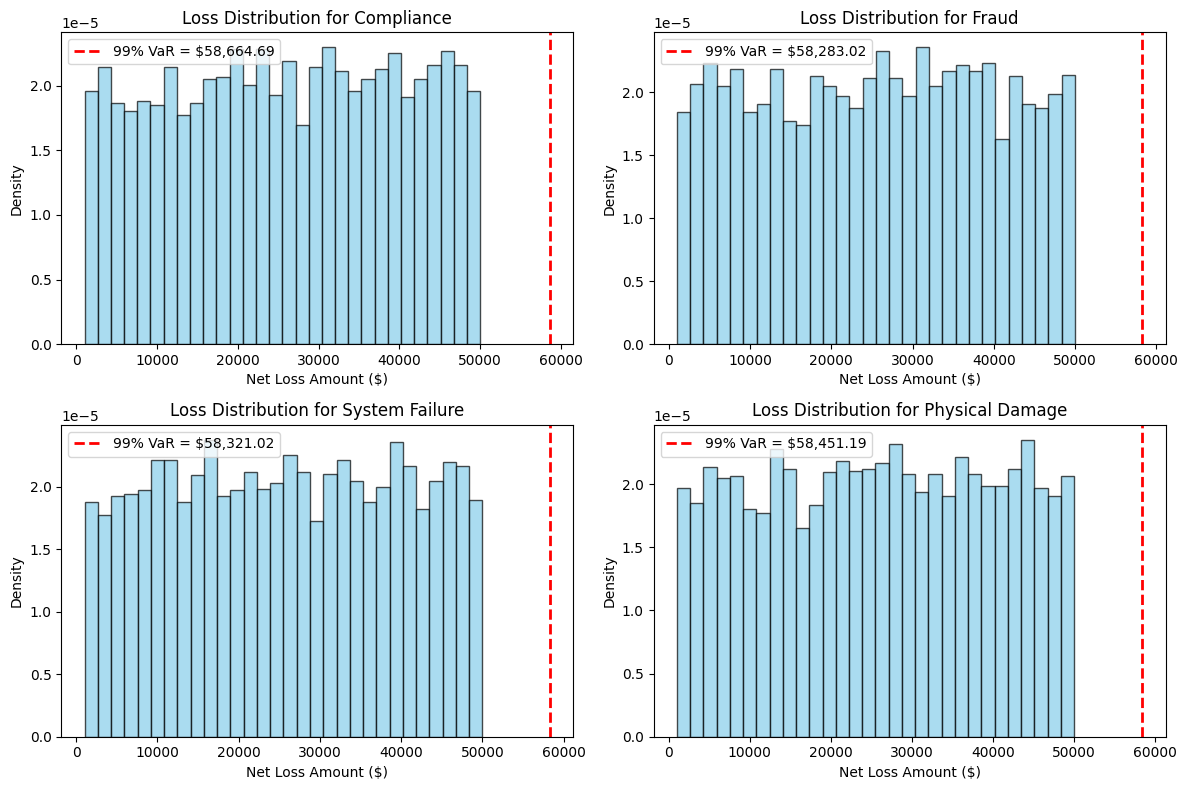

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data
df = pd.read_csv("operational_risk_dataset.csv")

# Check the first few rows of the dataset
print(df.head())

# Step 1: Group by Event Type and Calculate Severity Statistics
severity_stats = df.groupby("Event Type")["Net Loss Amount"].agg(['mean', 'var', 'count'])
severity_stats.columns = ['Mean Loss', 'Variance', 'Count']
print("\nSeverity Statistics by Event Type:")
print(severity_stats)

# Step 2: Calculate 99% Value-at-Risk (VaR) for Each Event Type
confidence_level = 0.99
z_99 = stats.norm.ppf(confidence_level)  # z-score for 99% confidence

# Function to calculate VaR for each group
def calculate_var(group):
    mean = group["Net Loss Amount"].mean()
    std_dev = group["Net Loss Amount"].std()
    VaR = mean + z_99 * std_dev  # VaR calculation for normal approximation
    return VaR

# Apply the function to each event type
severity_stats['99% VaR'] = df.groupby("Event Type").apply(calculate_var)
print("\n99% Value-at-Risk (VaR) by Event Type:")
print(severity_stats[['Mean Loss', '99% VaR']])

# Step 3: Visualize Loss Distributions and VaR for Each Event Type
plt.figure(figsize=(12, 8))

# Loop through each event type and plot the distribution
for i, event_type in enumerate(df["Event Type"].unique()):
    plt.subplot(2, 2, i + 1)
    losses = df[df["Event Type"] == event_type]["Net Loss Amount"]
    
    # Plot histogram of losses
    plt.hist(losses, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
    
    # Plot VaR line
    VaR = severity_stats.loc[event_type, '99% VaR']
    plt.axvline(VaR, color='red', linestyle='--', linewidth=2, label=f'99% VaR = ${VaR:,.2f}')
    
    # Labeling and title
    plt.title(f"Loss Distribution for {event_type}")
    plt.xlabel("Net Loss Amount ($)")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()


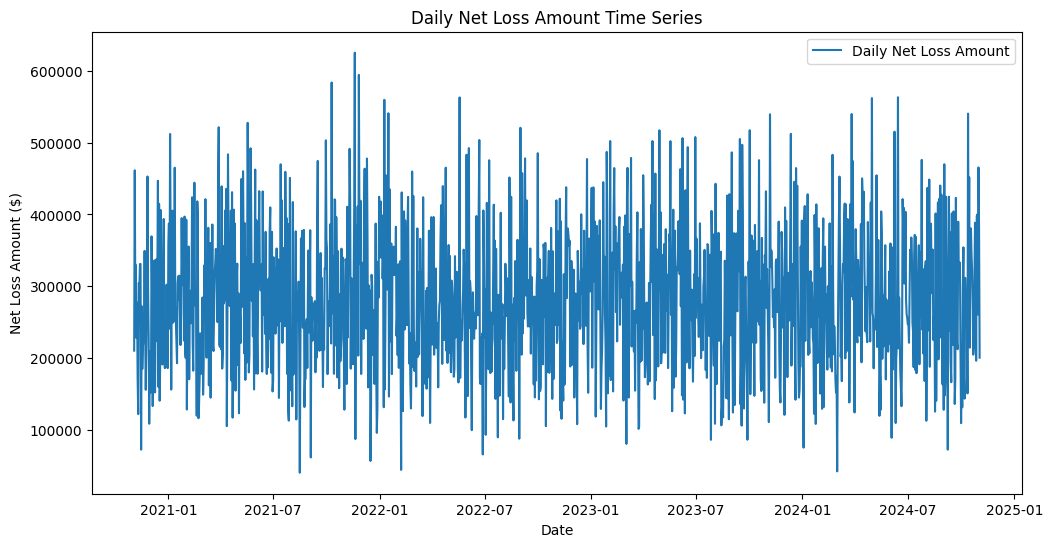

ADF Statistic: -19.97091036338197
p-value: 0.0


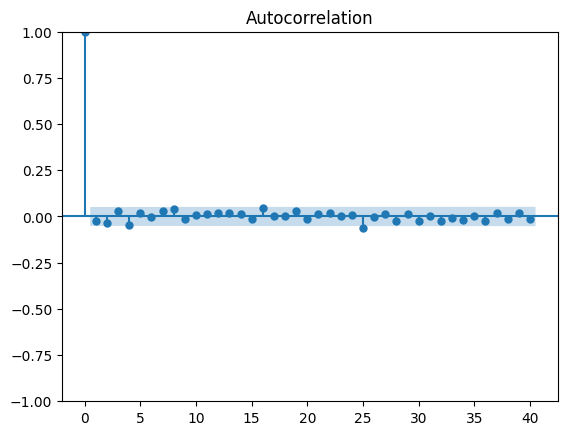

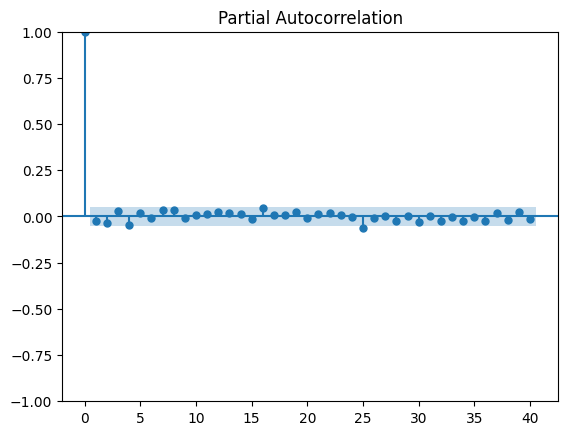

                               SARIMAX Results                                
Dep. Variable:        Net Loss Amount   No. Observations:                 1461
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18854.698
Date:                Sat, 02 Nov 2024   AIC                          37715.396
Time:                        17:03:54   BIC                          37731.255
Sample:                    11-03-2020   HQIC                         37721.312
                         - 11-02-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0234      0.034     -0.692      0.489      -0.090       0.043
ma.L1         -0.9991      0.009   -112.904      0.000      -1.016      -0.982
sigma2      1.191e+10   1.14e-13   1.05e+23      0.0

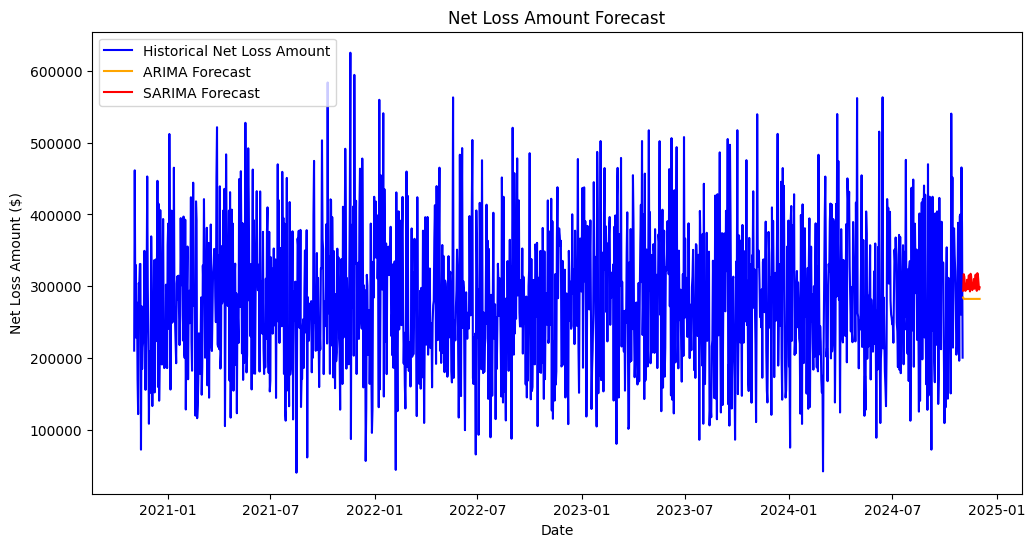

In [5]:
# pip install pandas numpy matplotlib statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Load the data
df = pd.read_csv("operational_risk_dataset.csv")

# Ensure Date column is in datetime format and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Aggregate net loss amounts by date (daily frequency)
daily_loss = df.resample('D')['Net Loss Amount'].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_loss, label='Daily Net Loss Amount')
plt.title('Daily Net Loss Amount Time Series')
plt.xlabel('Date')
plt.ylabel('Net Loss Amount ($)')
plt.legend()
plt.show()

# Step 1: Check for stationarity
result = adfuller(daily_loss.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Step 2: If non-stationary, difference the series
if result[1] > 0.05:
    daily_loss_diff = daily_loss.diff().dropna()
else:
    daily_loss_diff = daily_loss

# Step 3: Identify p, d, q parameters using ACF and PACF
sm.graphics.tsa.plot_acf(daily_loss_diff.dropna(), lags=40)
sm.graphics.tsa.plot_pacf(daily_loss_diff.dropna(), lags=40)
plt.show()

# Step 4: Fit ARIMA model (p=1, d=1, q=1 as an example)
p, d, q = 1, 1, 1
arima_model = ARIMA(daily_loss, order=(p, d, q))
arima_fit = arima_model.fit()
print(arima_fit.summary())

# Step 5: Fit SARIMA model (p=1, d=1, q=1, P=1, D=1, Q=1, s=12 as an example for seasonal data)
P, D, Q, s = 1, 1, 1, 12  # You can adjust these values based on your analysis
sarima_model = SARIMAX(daily_loss, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit()
print(sarima_fit.summary())

# Step 6: Fit SARIMAX model (including exogenous variables if you have them)
# If you don't have exogenous variables, you can skip this step.
# For example, let's assume you have a variable `exogenous_var` in your dataset
# exogenous_var = df['Some_Exogenous_Variable']  # Placeholder for exogenous variable
# sarimax_model = SARIMAX(daily_loss, order=(p, d, q), seasonal_order=(P, D, Q, s), exog=exogenous_var)
# sarimax_fit = sarimax_model.fit()
# print(sarimax_fit.summary())

# Step 7: Forecasting future values
forecast_steps = 30  # Forecast for the next 30 days

# Forecast using ARIMA
arima_forecast = arima_fit.forecast(steps=forecast_steps)

# Forecast using SARIMA
sarima_forecast = sarima_fit.forecast(steps=forecast_steps)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_loss, label='Historical Net Loss Amount', color='blue')
plt.plot(pd.date_range(daily_loss.index[-1], periods=forecast_steps + 1, freq='D')[1:], arima_forecast, label='ARIMA Forecast', color='orange')
plt.plot(pd.date_range(daily_loss.index[-1], periods=forecast_steps + 1, freq='D')[1:], sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('Net Loss Amount Forecast')
plt.xlabel('Date')
plt.ylabel('Net Loss Amount ($)')
plt.legend()
plt.show()


ADF Statistic: -19.97091036338197
p-value: 0.0
ADF Statistic: -19.522480697799754
p-value: 0.0


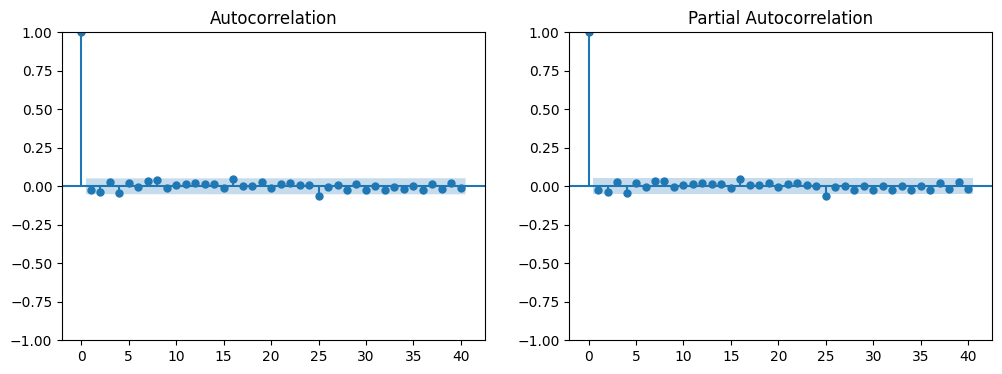

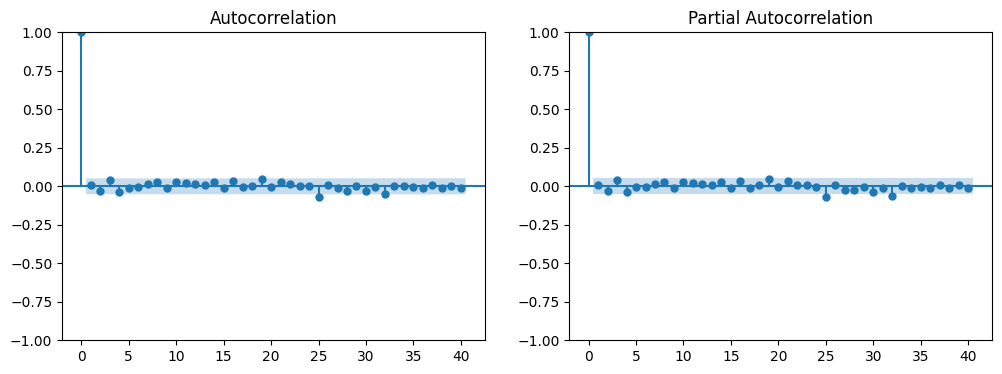

                               SARIMAX Results                                
Dep. Variable:        Net Loss Amount   No. Observations:                 1461
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18854.698
Date:                Sat, 02 Nov 2024   AIC                          37715.396
Time:                        17:10:23   BIC                          37731.255
Sample:                    11-03-2020   HQIC                         37721.312
                         - 11-02-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0234      0.034     -0.692      0.489      -0.090       0.043
ma.L1         -0.9991      0.009   -112.904      0.000      -1.016      -0.982
sigma2      1.191e+10   1.14e-13   1.05e+23      0.0

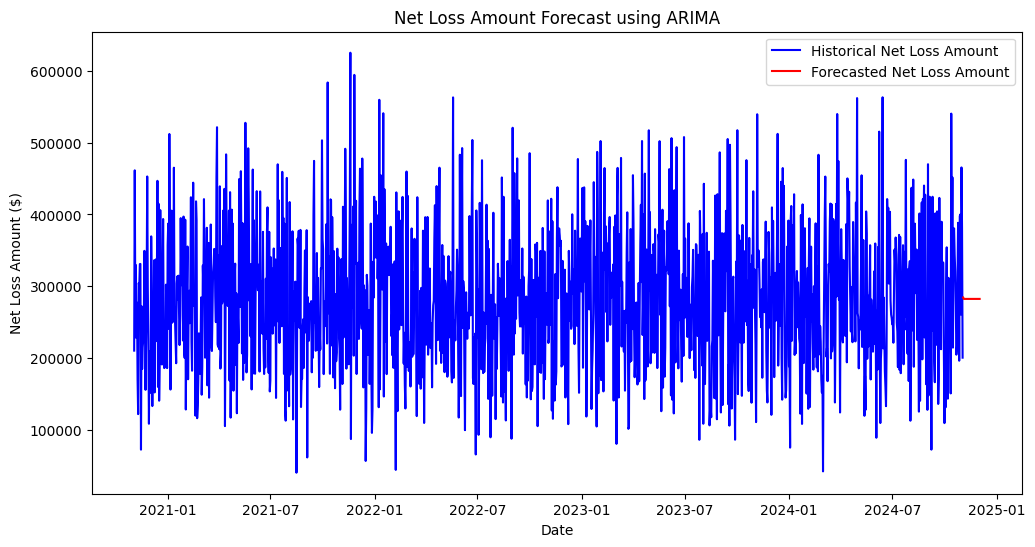

                                     SARIMAX Results                                      
Dep. Variable:                           Event ID   No. Observations:                 1461
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3816.568
Date:                            Sat, 02 Nov 2024   AIC                           7643.135
Time:                                    17:10:26   BIC                           7669.525
Sample:                                11-03-2020   HQIC                          7652.984
                                     - 11-02-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0053      0.027      0.197      0.844      -0.048       0.058
ma.L1         -0.9995      0.031   

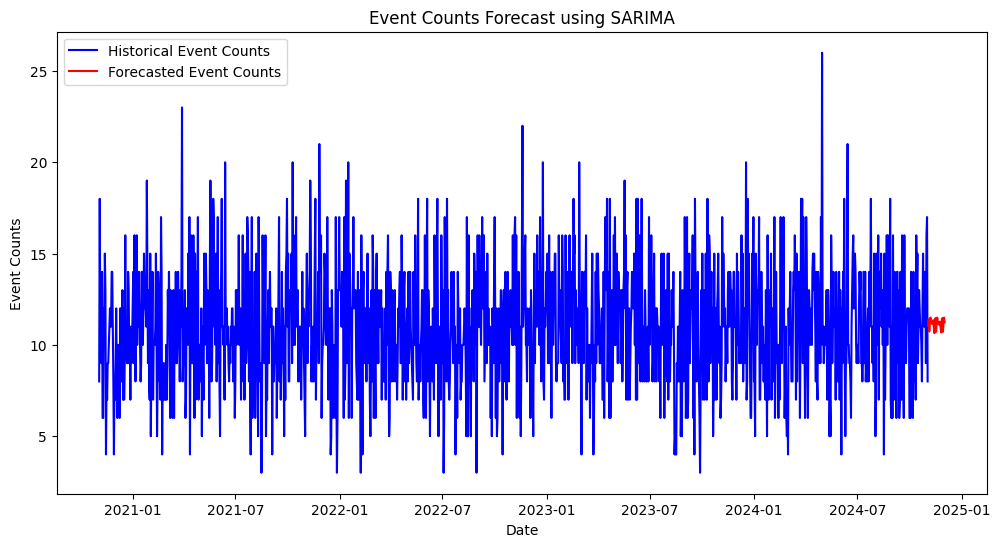

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load the data
df = pd.read_csv("operational_risk_dataset.csv")

# Ensure Date column is in datetime format and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Aggregate net loss amounts and event counts by date
daily_loss = df.resample('D')['Net Loss Amount'].sum()
daily_events = df.resample('D')['Event ID'].count()  # Assuming Event ID is a unique identifier for events

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1] <= 0.05  # Return True if stationary

# Function to plot ACF and PACF
def plot_acf_pacf(series):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sm.graphics.tsa.plot_acf(series, lags=40, ax=axes[0])
    sm.graphics.tsa.plot_pacf(series, lags=40, ax=axes[1])
    plt.show()

# Step 1: Check stationarity for net loss and event counts
is_stationary_loss = check_stationarity(daily_loss)
is_stationary_events = check_stationarity(daily_events)

if not is_stationary_loss:
    daily_loss_diff = daily_loss.diff().dropna()
    is_stationary_loss = check_stationarity(daily_loss_diff)

if not is_stationary_events:
    daily_events_diff = daily_events.diff().dropna()
    is_stationary_events = check_stationarity(daily_events_diff)

# Step 2: Plot ACF and PACF for both series
plot_acf_pacf(daily_loss)
plot_acf_pacf(daily_events)

# Step 3: Fit ARIMA model for Net Loss Amounts
p, d, q = 1, 1, 1  # Example values; adjust based on ACF/PACF analysis
model_loss = ARIMA(daily_loss, order=(p, d, q))
model_loss_fit = model_loss.fit()
print(model_loss_fit.summary())

# Step 4: Forecast future net losses
forecast_steps = 30
forecast_loss = model_loss_fit.forecast(steps=forecast_steps)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_loss, label='Historical Net Loss Amount', color='blue')
plt.plot(pd.date_range(daily_loss.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast_loss, label='Forecasted Net Loss Amount', color='red')
plt.title('Net Loss Amount Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Net Loss Amount ($)')
plt.legend()
plt.show()

# Step 5: Fit SARIMA model for Event Counts
p, d, q = 1, 1, 1  # Adjust based on ACF/PACF analysis
P, D, Q, s = 1, 1, 1, 12  # Seasonal parameters (monthly seasonality)
model_events = sm.tsa.SARIMAX(daily_events, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_events_fit = model_events.fit()
print(model_events_fit.summary())

# Step 6: Forecast future event counts
forecast_events = model_events_fit.forecast(steps=forecast_steps)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_events, label='Historical Event Counts', color='blue')
plt.plot(pd.date_range(daily_events.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast_events, label='Forecasted Event Counts', color='red')
plt.title('Event Counts Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Event Counts')
plt.legend()
plt.show()
